# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Alejandro

Apellidos: Alamán San Martín

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Análisis descriptivos


In [9]:
df = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")
df['date'] = pd.to_datetime(df['date'])

print(df.describe())
print(df['neighbourhood_group'].value_counts())
df.head()


                                date     m2_price    inflation         HICP  \
count                           2218  2218.000000  2218.000000  2218.000000   
mean   2018-09-02 01:15:57.619476992    12.884472     0.166231     1.914022   
min              2010-08-01 00:00:00     7.400000    -1.900000    -1.500000   
25%              2016-03-01 00:00:00    10.900000    -0.100000     0.000000   
50%              2018-11-01 00:00:00    12.400000     0.200000     1.300000   
75%              2021-06-01 00:00:00    14.900000     0.500000     2.900000   
max              2023-12-01 00:00:00    22.500000     3.000000    10.700000   
std                              NaN     2.888559     0.666500     2.713414   

       population_density  listings_count  minimum_nights  nigth_price  \
count         2218.000000     2218.000000     2218.000000  2218.000000   
mean           827.942290      124.464833        7.589035   102.360413   
min            795.000000        1.000000        1.000000    17.00

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,4,100.0,0.5925,3,0,4,0,0
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,11,264.4,1.6120,4,1,4,0,0
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,15,289.8,1.7680,4,1,4,0,0


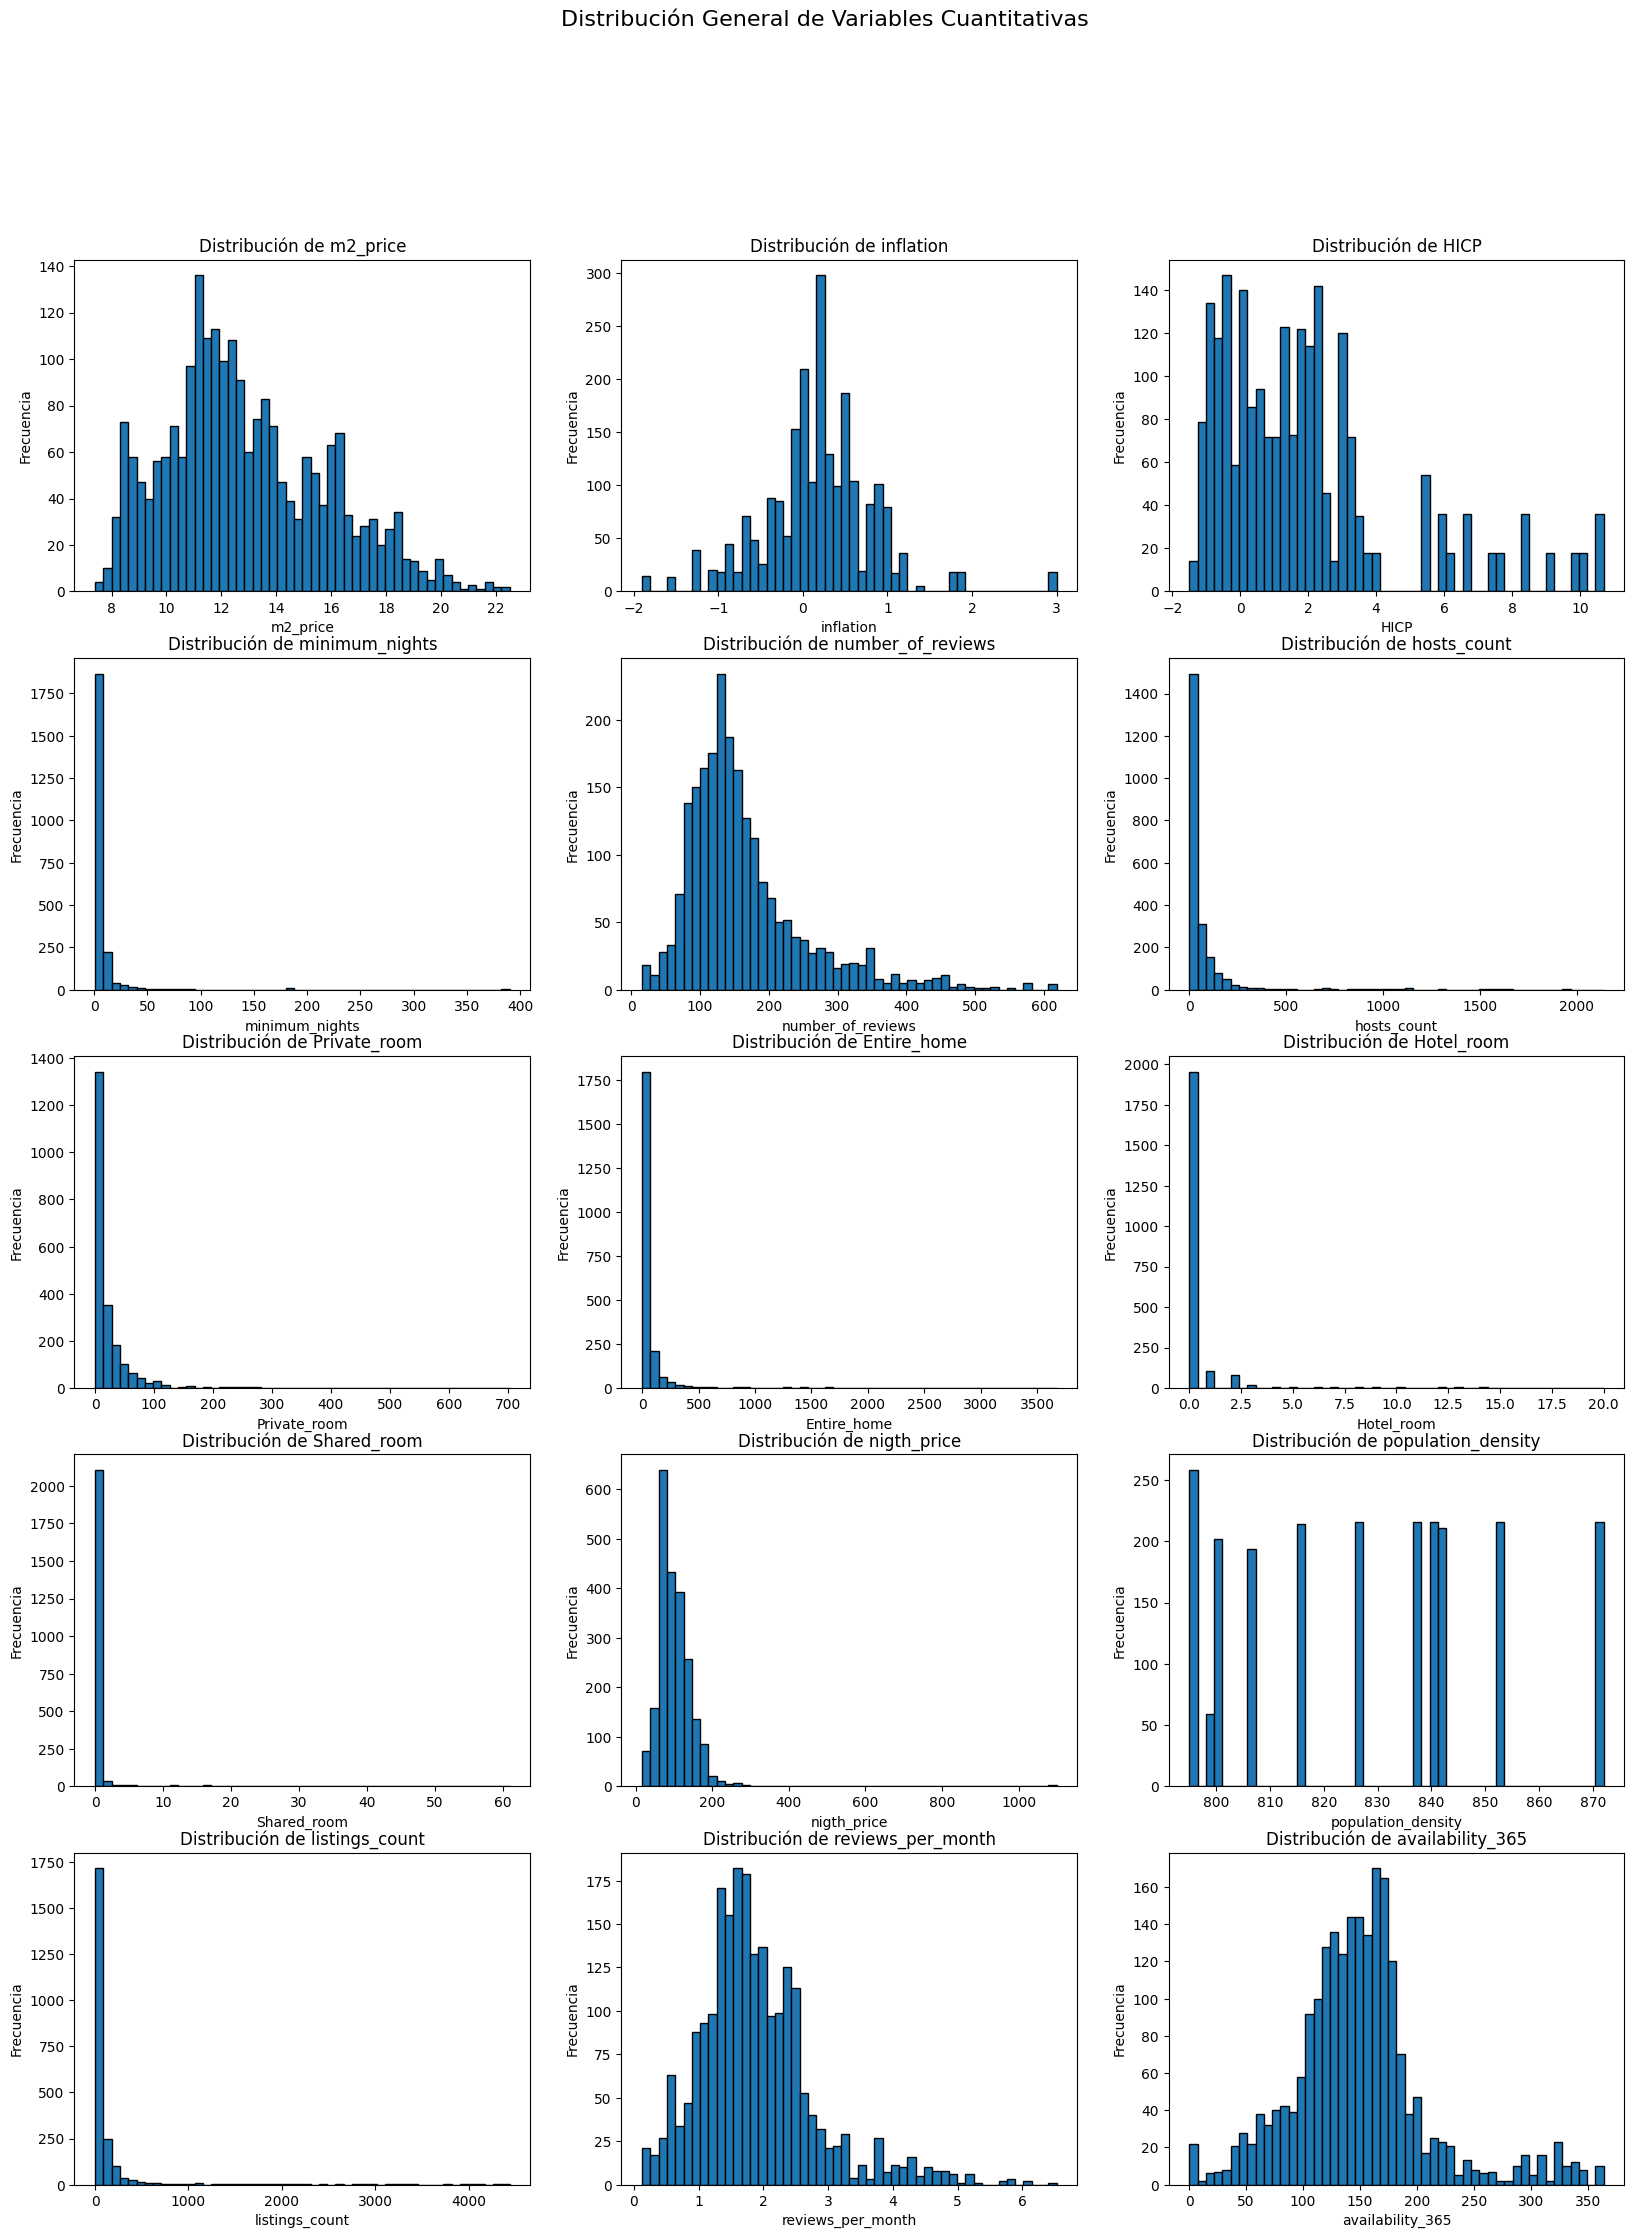

In [ ]:
## Visualización General de los Datos

fig, axes = plt.subplots(5, 3, figsize=(20, 5*5))
fig.suptitle('Distribución General de Variables Cuantitativas', fontsize=16)

variables = ['m2_price', 'inflation', 'HICP', 'minimum_nights', 'number_of_reviews', 'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room', 'nigth_price', 'population_density', 'listings_count', 'reviews_per_month', 'availability_365']

for ax, var in zip(axes.flatten(), variables):
    ax.hist(df[var].dropna(), bins=50, edgecolor='black')
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

plt.show()

## Vemos variables con diferentes rangos de valores que posiblemente tengamos que tener en cuenta más adelante.

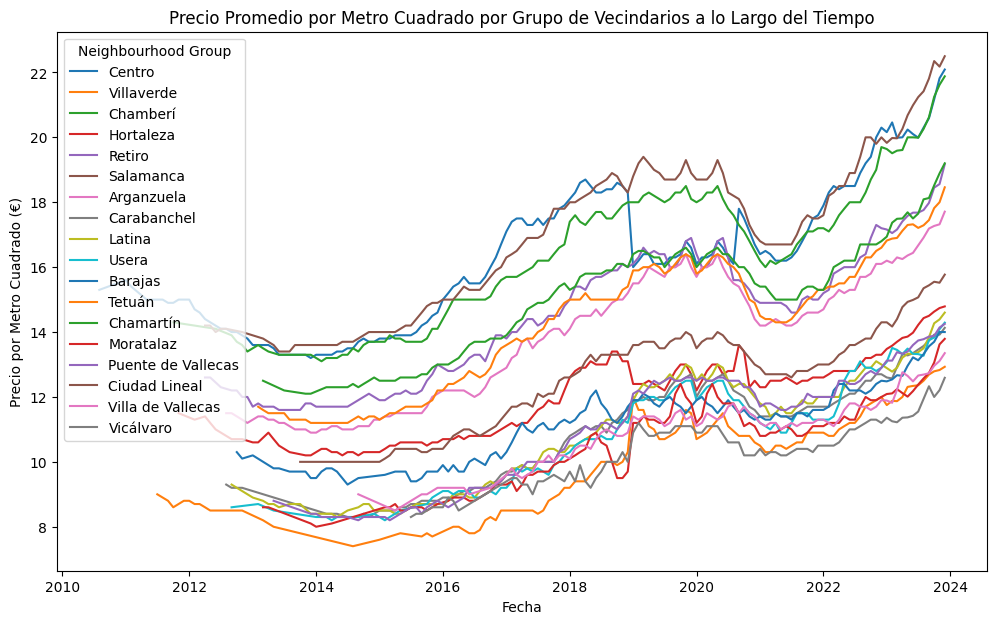

In [ ]:
## 1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?

m2_price_trend = df.groupby([df['date'].dt.to_period('M'), 'neighbourhood_group'])['m2_price'].mean().reset_index()
m2_price_trend['date'] = m2_price_trend['date'].dt.to_timestamp()

# Visualización
plt.figure(figsize=(12, 7))
for group in m2_price_trend['neighbourhood_group'].unique():
    subset = m2_price_trend[m2_price_trend['neighbourhood_group'] == group]
    plt.plot(subset['date'], subset['m2_price'], label=group)

plt.title('Precio Promedio por Metro Cuadrado por Grupo de Vecindarios a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio por Metro Cuadrado (€)')
plt.legend(title='Neighbourhood Group')
plt.show()

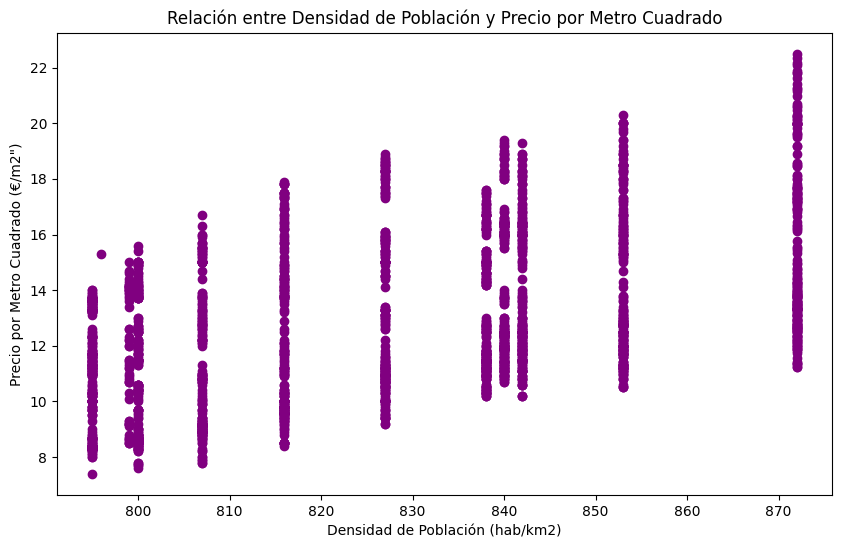

In [ ]:
## 2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
plt.figure(figsize=(10, 6))
plt.scatter(df['population_density'], df['m2_price'], color='purple')
plt.title('Relación entre Densidad de Población y Precio por Metro Cuadrado')
plt.xlabel('Densidad de Población (hab/km2)')
plt.ylabel('Precio por Metro Cuadrado (€/m2")')
plt.show()

## Se puede apreciar cierta correlación entre estas dos variables ya que el precio es más alto a mayor densidad de población.

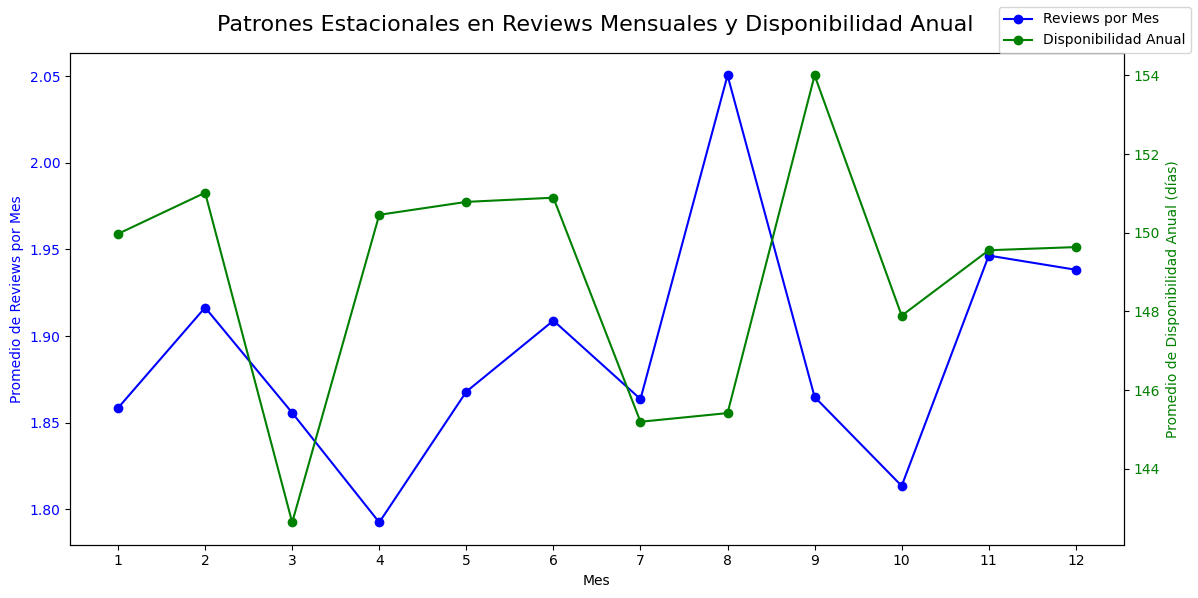

In [17]:
## 3.¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?

# Agrupar por mes
df['month'] = df['date'].dt.month
seasonal_trends = df.groupby('month')[['reviews_per_month', 'availability_365']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# reviews_per_month
ax1.plot(seasonal_trends.index, seasonal_trends['reviews_per_month'], marker='o', color='blue', label='Reviews por Mes')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Promedio de Reviews por Mes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(1, 13))

# availability_365
ax2 = ax1.twinx()
ax2.plot(seasonal_trends.index, seasonal_trends['availability_365'], marker='o', color='green', label='Disponibilidad Anual')
ax2.set_ylabel('Promedio de Disponibilidad Anual (días)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Patrones Estacionales en Reviews Mensuales y Disponibilidad Anual', fontsize=16)
fig.tight_layout()
fig.legend()
plt.show()

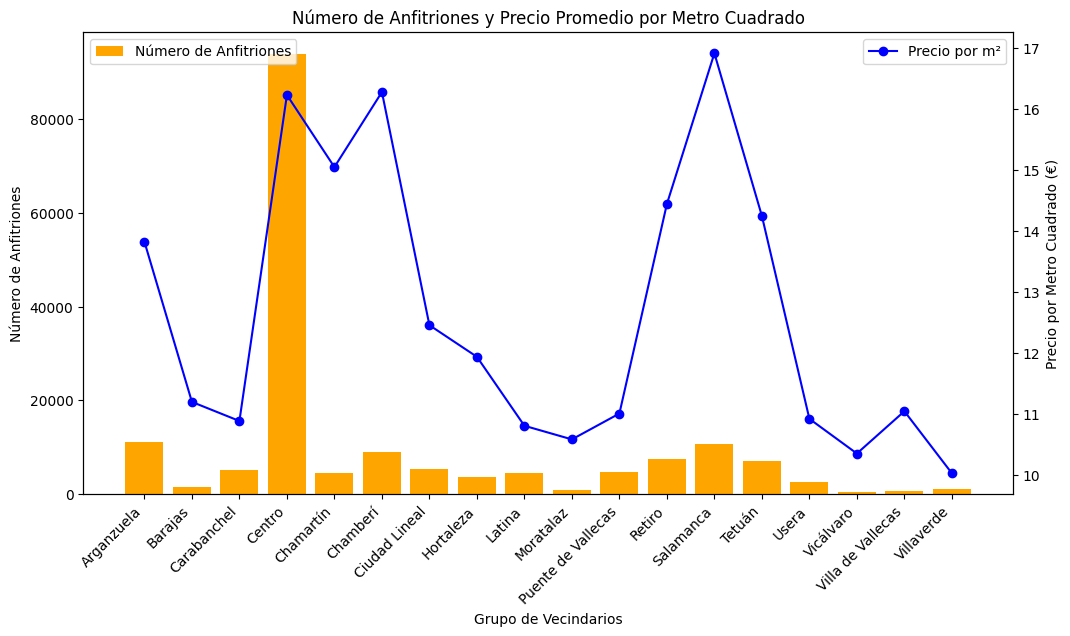

In [27]:
## 4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?

# Agrupar por neighbourhood_group
hosts_price = df.groupby('neighbourhood_group').agg({'hosts_count': 'sum', 'm2_price': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# hosts_count
ax1.bar(hosts_price['neighbourhood_group'], hosts_price['hosts_count'], color='orange', label='Número de Anfitriones')
ax1.set_ylabel('Número de Anfitriones')
ax1.set_xlabel('Grupo de Vecindarios')
ax1.set_title('Número de Anfitriones y Precio Promedio por Metro Cuadrado')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')

# m2_price
ax2 = ax1.twinx()
ax2.plot(hosts_price['neighbourhood_group'], hosts_price['m2_price'], color='blue', marker='o', label='Precio por m²')
ax2.set_ylabel('Precio por Metro Cuadrado (€)')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper right')

plt.show()

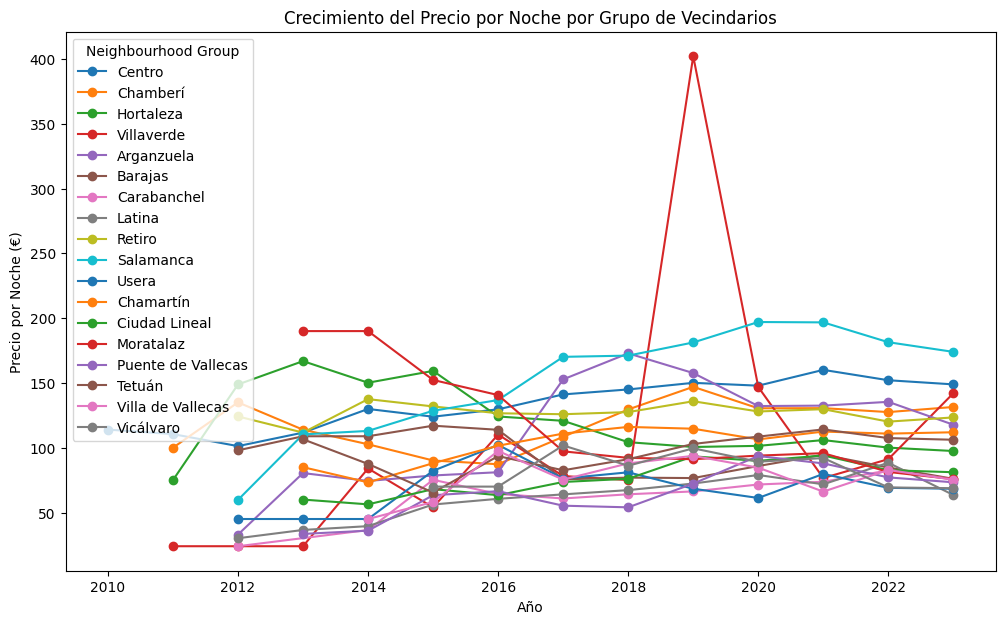

In [37]:
## 5. ¿Qué vecindarios muestran el mayor crecimiento en precios (nigth_price) entre años (year)?

# Agrupar por año y neighbourhood_group
df['year'] = df['date'].dt.year
price_growth = df.groupby(['year', 'neighbourhood_group'])['nigth_price'].mean().reset_index()

plt.figure(figsize=(12, 7))
for barrio in price_growth['neighbourhood_group'].unique():
    dfbarrio = price_growth[price_growth['neighbourhood_group'] == barrio]
    plt.plot(dfbarrio['year'], dfbarrio['nigth_price'], marker='o', label=barrio)

plt.title('Crecimiento del Precio por Noche por Grupo de Vecindarios')
plt.xlabel('Año')
plt.ylabel('Precio por Noche (€)')
plt.legend(title='Neighbourhood Group')
plt.show()

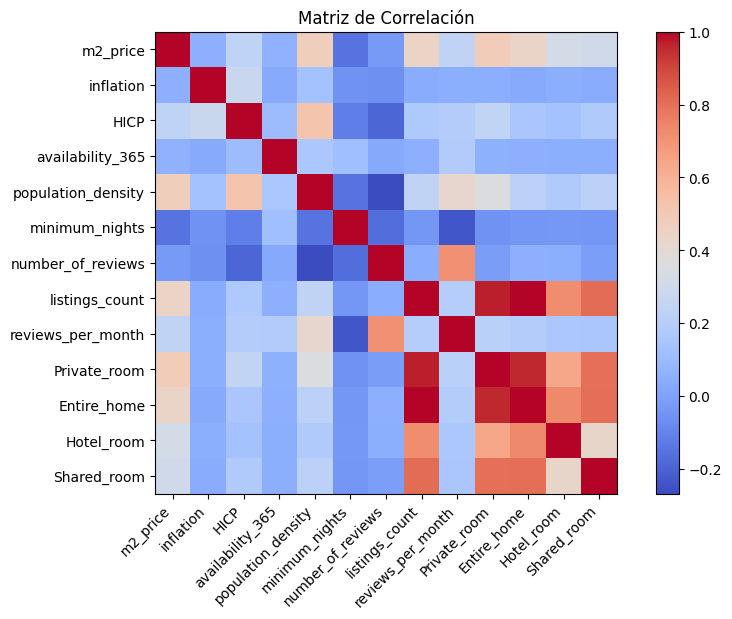

In [ ]:
## 6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones
# en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

variables = ['m2_price', 'inflation', 'HICP', 'availability_365', 'population_density',
             'minimum_nights', 'number_of_reviews', 'listings_count', 'reviews_per_month',
             'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']
correlation_matrix = df[variables].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(variables)), variables, rotation=45, ha='right')
plt.yticks(range(len(variables)), variables)
plt.title('Matriz de Correlación')
plt.show()

# Modelo

In [35]:
## modelo de regresión lineal

# Eliminar filas con valores nulos
df = df.dropna(subset=['m2_price', 'inflation', 'HICP', 'population_density', 'listings_count', 
                       'minimum_nights', 'nigth_price', 'availability_365','number_of_reviews',
                       'reviews_per_month', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room'])

# Agrupar los datos sin considerar barrios
aggregated_data = df.groupby('date').agg({
    'm2_price': 'mean',
    'inflation': 'mean',
    'HICP': 'mean',
    'population_density': 'mean',
    'listings_count': 'sum',
    'minimum_nights': 'mean',
    'nigth_price': 'mean',
    'availability_365': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'Private_room': 'sum',
    'Entire_home': 'sum',
    'Hotel_room': 'sum',
    'Shared_room': 'sum'
}).reset_index()

print(aggregated_data.head())

# Definir variables
X = aggregated_data[['inflation', 'HICP', 'population_density', 'listings_count', 
                       'minimum_nights', 'nigth_price', 'availability_365','number_of_reviews',
                       'reviews_per_month', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']]
y = aggregated_data['m2_price']

# Entrenamiento
model = LinearRegression()
model.fit(X, y)

# Coeficientes y la intersección
coefficients = model.coef_
intercept = model.intercept_
variables = X.columns

print("\n--- Coeficientes del Modelo de Regresión Lineal ---")
for var, coef in zip(variables, coefficients):
    print(f"{var}: {coef:.4f}")
print(f"\nIntersección (Intercept): {intercept:.4f}")

# Evaluar el modelo
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\nR² (Coeficiente de Determinación): {r2:.4f}")
print(f"RMSE (Error Cuadrático Medio): {rmse:.4f}")


        date  m2_price  inflation  HICP  population_density  listings_count  \
0 2010-08-01      15.3        0.3   1.6               796.0               1   
1 2011-01-01      15.6       -0.7   3.0               800.0               1   
2 2011-02-01      15.4        0.1   3.4               800.0               4   
3 2011-05-01      15.0        0.0   3.4               800.0               5   
4 2011-06-01      15.0       -0.1   3.0               800.0               5   

   minimum_nights  nigth_price  availability_365  number_of_reviews  \
0             2.0   114.000000            305.00              155.0   
1             2.0   114.000000            305.00              155.0   
2             7.0   184.000000             44.25              100.0   
3             9.6    61.000000            134.60              264.4   
4             5.4   135.333333            129.20              289.8   

   reviews_per_month  Private_room  Entire_home  Hotel_room  Shared_room  
0             0.9000   